# LAB Neural Networks

In this lab, you will explore different ways to use the types of neural nets we explored during the lecture

1. We are starting from the *perceptron*

In [115]:
#install the libraries
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

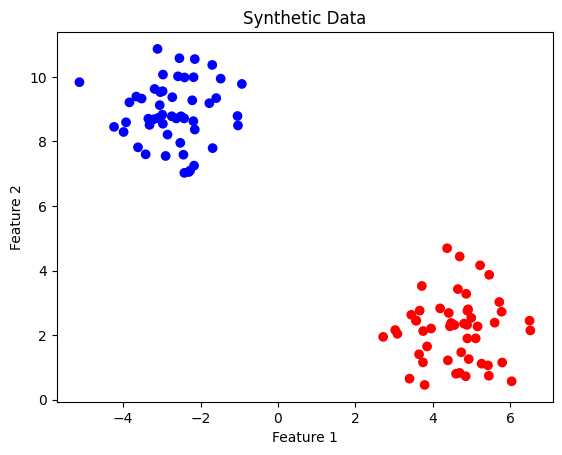

In [117]:
# Generate synthetic data. 
# Play around with these parameters to see how the data changes and how accurate the perceptron will be at the end
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
y = y * 2 - 1  # Convert labels to -1 and 1

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data')
plt.show()

In [118]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Train a perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron()

In [120]:
# Evaluate the perceptron
accuracy = perceptron.score(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 1.0


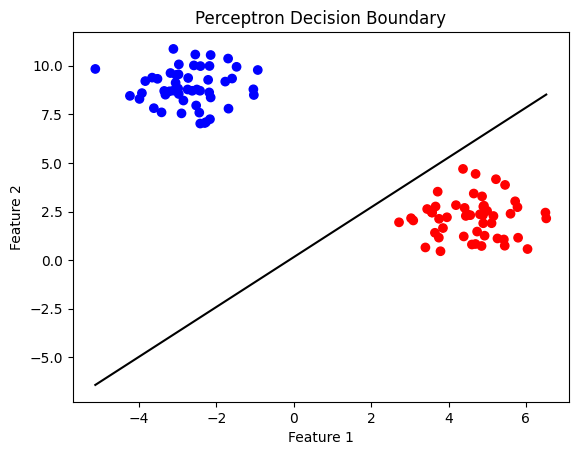

In [121]:
# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(perceptron.coef_[0][0] * x_values + perceptron.intercept_[0]) / perceptron.coef_[0][1]
plt.plot(x_values, y_values, color='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.show()

Good job! Play around with the parameters of your simulated data and check if the perceptron is a good classifier. Can you think of any way you can apply this to your data? 

2. Moving on, we are going to explore a *single-Layer neural network*. (This neural network only has one hidden layer.) Remember the iris dataset? 

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [123]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shape of the data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (120, 4)
Test data shape: (30, 4)


In [124]:
# Define the neural network with one hidden layer containing 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=100, verbose=True)

# Train the model
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.21785181
Iteration 2, loss = 1.21042266
Iteration 3, loss = 1.20303211
Iteration 4, loss = 1.19568367
Iteration 5, loss = 1.18837422
Iteration 6, loss = 1.18111277
Iteration 7, loss = 1.17390679
Iteration 8, loss = 1.16674487
Iteration 9, loss = 1.15961451
Iteration 10, loss = 1.15254481
Iteration 11, loss = 1.14554847
Iteration 12, loss = 1.13861531
Iteration 13, loss = 1.13174123
Iteration 14, loss = 1.12490861
Iteration 15, loss = 1.11812313
Iteration 16, loss = 1.11138693
Iteration 17, loss = 1.10471400
Iteration 18, loss = 1.09810165
Iteration 19, loss = 1.09155043
Iteration 20, loss = 1.08506042
Iteration 21, loss = 1.07863421
Iteration 22, loss = 1.07225248
Iteration 23, loss = 1.06592890
Iteration 24, loss = 1.05965266
Iteration 25, loss = 1.05339723
Iteration 26, loss = 1.04719105
Iteration 27, loss = 1.04103195
Iteration 28, loss = 1.03492580
Iteration 29, loss = 1.02885006
Iteration 30, loss = 1.02282652
Iteration 31, loss = 1.01683703
Iteration 32, los

c:\Users\aleja\anaconda3\envs\malawi\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, verbose=True)

In [125]:
# Evaluate the model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.8333333333333334


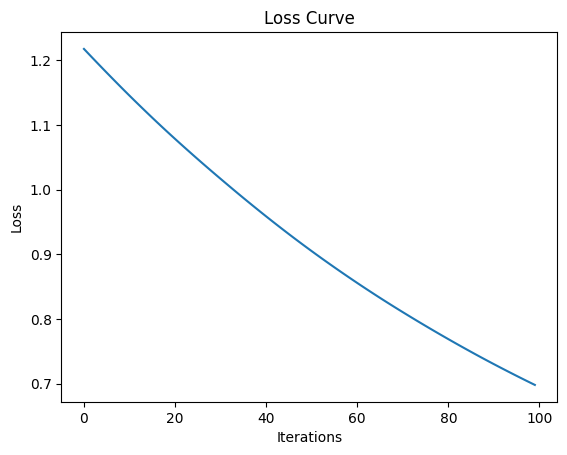

In [126]:
# Plot loss curve
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

The accuracy seems to be quite low (0.6). What can you modify in the code to improve the accuracy? Think well about the parameters of your model. 

3. Let's play around with another fun dataset, the MNIST dataset. This is the handwritten digits dataset. 

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Load the MNIST dataset. This might take a while, don't worry 
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)




c:\Users\aleja\anaconda3\envs\malawi\lib\site-packages\sklearn\datasets\_openml.py:75: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


Training data shape: (56000, 784)
Test data shape: (14000, 784)


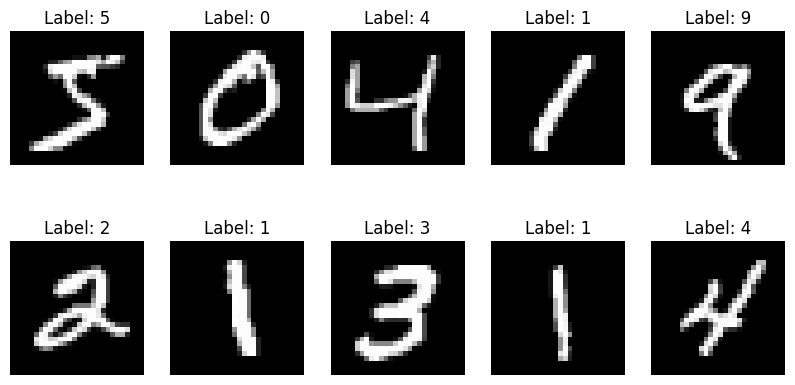

In [129]:
# Visualize some samples from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off')
plt.show()

In [130]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shape of the data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (56000, 784)
Test data shape: (14000, 784)


In [131]:
# Define the multi-layer neural network
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=20, verbose=True)

# Train the model
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.33674223
Iteration 2, loss = 0.11401384
Iteration 3, loss = 0.07347111
Iteration 4, loss = 0.04820663
Iteration 5, loss = 0.03712811
Iteration 6, loss = 0.02740062
Iteration 7, loss = 0.01903050
Iteration 8, loss = 0.01454481
Iteration 9, loss = 0.00936562
Iteration 10, loss = 0.01018403
Iteration 11, loss = 0.01365575
Iteration 12, loss = 0.02266424
Iteration 13, loss = 0.01623366
Iteration 14, loss = 0.01008186
Iteration 15, loss = 0.01036905
Iteration 16, loss = 0.00820046
Iteration 17, loss = 0.00309023
Iteration 18, loss = 0.00235488
Iteration 19, loss = 0.00204700
Iteration 20, loss = 0.00066347


c:\Users\aleja\anaconda3\envs\malawi\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, verbose=True)

In [132]:
# Evaluate the model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9738571428571429


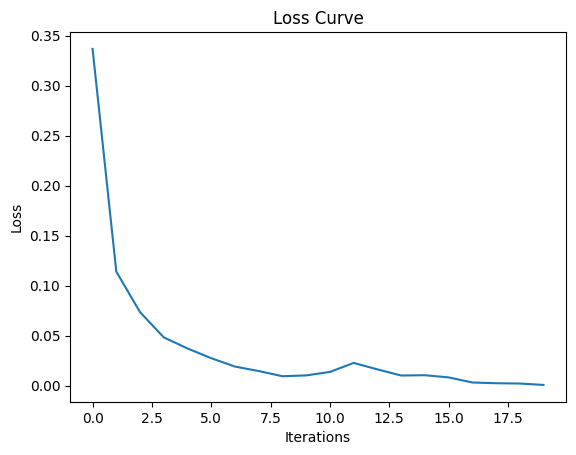

In [133]:
# Plot loss curve
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Pay attention to how long it took to go through the different iterations. Why do you think it is taking longer to run? What would happen to the accuracy if you modified the parameters?

4. Now onto something super exciting. Remember the CNN example we saw in the lecture? We are going to try to develop something similar using a library called *tensorflow* and a dataset called CIFAR-10. 

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. 

The classes are mutually exclusive and include:
Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck

**WARNING** This will use a lot of processing power and a lot of time to download the data. If your computer is slow, you can go online and import this worksheet on google colab! 

In [134]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [139]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Print the shape of the data
print(f'Training data shape: {train_images.shape}')
print(f'Test data shape: {test_images.shape}')

 75071488/170498071 ━━━━━━━━━━━━━━━━━━━━ 9:35 6us/step

KeyboardInterrupt: 

NameError: name 'train_images' is not defined

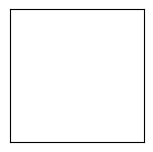

In [136]:
# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize some samples from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Calculate and print mean and standard deviation of pixel values
mean_train = np.mean(train_images)
std_train = np.std(train_images)
mean_test = np.mean(test_images)
std_test = np.std(test_images)

print(f'Mean pixel value in training set: {mean_train}')
print(f'Standard deviation of pixel values in training set: {std_train}')
print(f'Mean pixel value in test set: {mean_test}')
print(f'Standard deviation of pixel values in test set: {std_test}')

In [ ]:
# Define the CNN model
# Hyperparameter Tuning
# Experiment with different numbers of filters, kernel sizes, or learning rates
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Print the model summary
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc}')

# The accuracy and loss curves show how well the model is learning over epochs.
# If the validation accuracy is much lower than the training accuracy, the model might be overfitting.
# If both accuracies are low, the model might be underfitting.

In [ ]:
# Plot loss and accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

5. Next, we will explore Recurrent Neural Networks (RNNs) using the IMDB movie reviews dataset for sentiment analysis, which is a common task for RNNs. This dataset is available in TensorFlow and contains 50,000 movie reviews labeled as positive or negative.

In [140]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
import matplotlib.pyplot as plt

In [141]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

# Print the shape of the data
print(f'Training data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training data shape: (25000,)
Test data shape: (25000,)


In [ ]:
##try to do some exploratory data analysis. If you are unsure how, look for more information about the dataset

# what does this data look like?

In [142]:
# Pad sequences to ensure they are of the same length
train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=500)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=500)

print(f'Training data shape after padding: {train_data.shape}')
print(f'Test data shape after padding: {test_data.shape}')

Training data shape after padding: (25000, 500)
Test data shape after padding: (25000, 500)


In [143]:
# Define the RNN model
model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=32, input_length=500))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

c:\Users\aleja\anaconda3\envs\malawi\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [144]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [146]:
# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(test_data, test_labels))

Epoch 1/10
  9/391 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.8753 - loss: 0.2943

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc}')

In [ ]:
# Plot loss and accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

6. LSTMs are a type of RNN designed to handle long-term dependencies in sequential data. They are particularly useful for tasks like time series forecasting, natural language processing, and speech recognition.

For the sake of time/space/processing, we are going to reuse the same IMDB dataset of the previous step, and we are going to see what happens when we switch model

In [ ]:
# Define the LSTM model
model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=32, input_length=500))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(test_data, test_labels))

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc}')

In [ ]:
# Plot loss and accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

If you reached this point and are looking for a more challenging intro to LSTMs, give this a look https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/